In [ ]:
# This script contains the following:
# 1. Importing the libraries and data
# 2. Time series analysis: decomposition
# 3. Testing for stationarity
# 4. Stationarizing the Federal Reserve Economic Data

In [1]:
#Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#configure API key

quandl.ApiConfig.api_key = 'uYj5dq_6n_sgMiRAQSPF'

In [5]:
data=quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['99693', '99637', '99618', '99614', '99613', '99608',
'99607', '99605', '99598', '99591', '99590', '99584', '99577', '99564', '99561', '99559', '99554', '99550', '99548',
'99547', '99546', '99541', '99539', '99537', '99535', '99533', '99532', '99531', '99529', '99525', '99524', '99523',
'99517', '99513', '99512', '99509', '99507', '99504', '99502', '99498', '99491'])

In [6]:
data.head()

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99693,2023-06-30,408740.044954
1,ZSFH,99693,2023-05-31,404173.615907
2,ZSFH,99693,2023-04-30,402335.252630
3,ZSFH,99693,2023-03-31,428386.045372
4,ZSFH,99693,2023-02-28,427202.540592


In [7]:
data.shape

(10000, 4)

In [8]:
data.columns

Index(['indicator_id', 'region_id', 'date', 'value'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

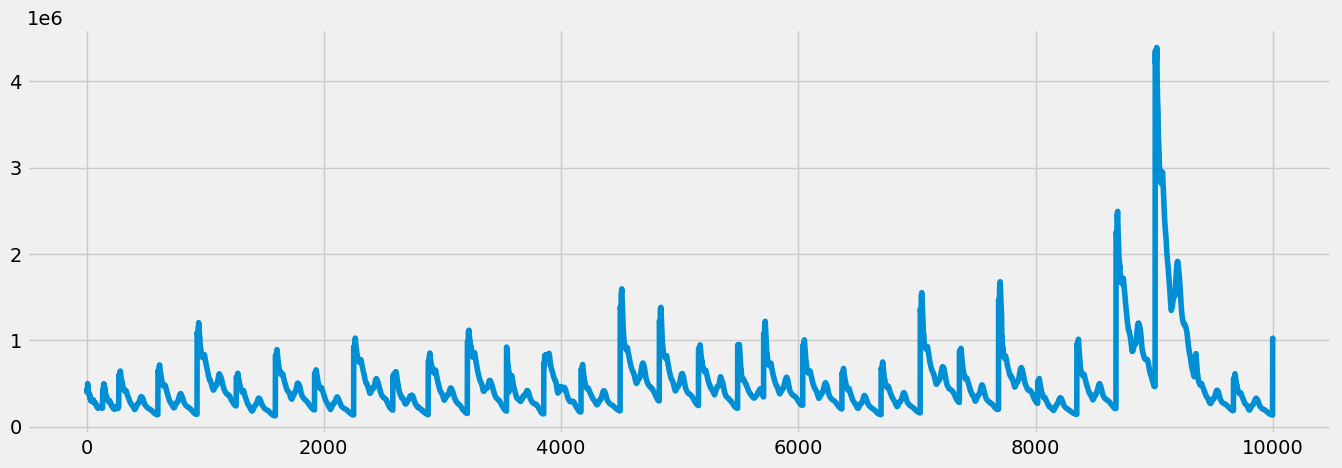

In [10]:
# Plot the data using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data['value'])
plt.show()

In [11]:
#2. Subsetting, wrangling, and cleaning time-series data
# Reset index so that you can use the \"Date\" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

,None,indicator_id,region_id,date,value
0,0,ZSFH,99693,2023-06-30,408740.044954
1,1,ZSFH,99693,2023-05-31,404173.615907
2,2,ZSFH,99693,2023-04-30,402335.252630
3,3,ZSFH,99693,2023-03-31,428386.045372
4,4,ZSFH,99693,2023-02-28,427202.540592


In [13]:
data_2.drop(['indicator_id', 'region_id', 'None'], axis=1, inplace=True)  # Drop the specified columns.
data_2.head()

,date,value
0,2023-06-30,408740.044954
1,2023-05-31,404173.615907
2,2023-04-30,402335.252630
3,2023-03-31,428386.045372
4,2023-02-28,427202.540592


In [14]:
data_sub = data_2.loc[(data_2['date'] >= '1980-01-01') & (data_2['date'] < '2020-06-01')]

In [15]:
data_sub.shape

(8877, 2)

In [16]:
# Check for missing values

data.isnull().sum() 

indicator_id    0
region_id       0
date            0
value           0
dtype: int64

In [17]:
data_sub.head()

,date,value
37,2020-05-31,305387.0
38,2020-04-30,308606.0
39,2020-03-31,304484.0
40,2020-02-29,303957.0
41,2020-01-31,303388.0


In [18]:
# Set the \"Date\" column as the index\

from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from \"Date.\"\"\n",
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.\n",
data_sub.drop(['date'], axis=1, inplace=True) # Drop the \"Date\" column.\n",
data_sub.head()

,value
datetime,
2020-05-31,305387.0
2020-04-30,308606.0
2020-03-31,304484.0
2020-02-29,303957.0
2020-01-31,303388.0


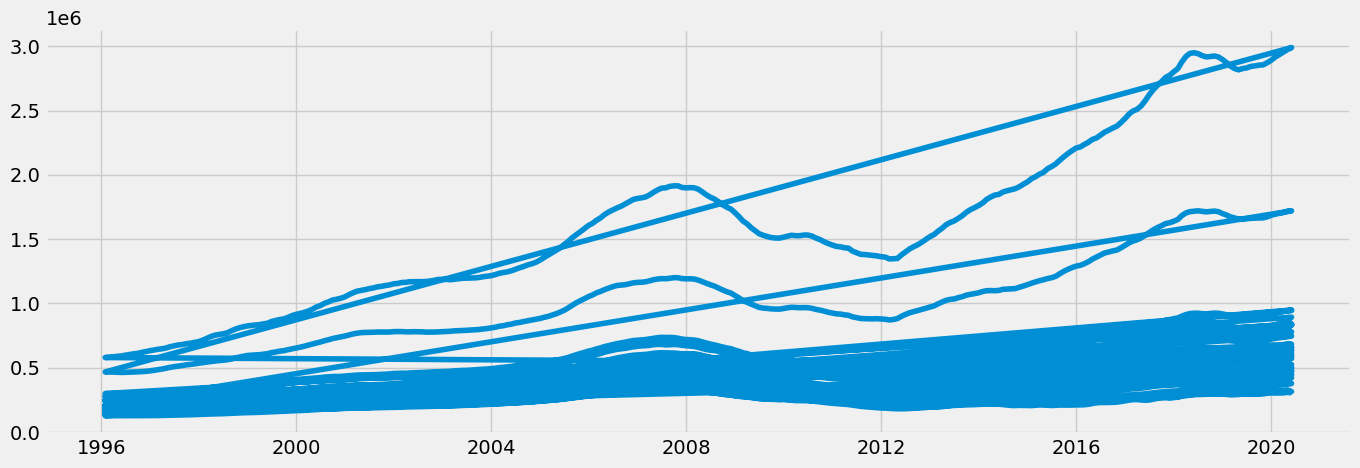

In [19]:
# Plot the new data set
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_sub)
plt.show()

In [20]:
# Check for missing values (you shouldn't have any

data_sub.isnull().sum()

value    0
dtype: int64

In [21]:
#check for dups

dups = data_sub.duplicated()
dups.sum()

68

In [46]:
data_sub.head(5)

,value
datetime,
2020-05-31,305387.0
2020-04-30,308606.0
2020-03-31,304484.0
2020-02-29,303957.0
2020-01-31,303388.0


In [30]:
# Remove duplicates based on the index ('datetime')
data_sub.drop_duplicates(inplace=True)

# Verify the removal of duplicates
dups_after_removal = data_sub.duplicated()
print("Number of duplicates after removal:", dups_after_removal.sum())


Number of duplicates after removal: 0


In [ ]:
# 3. Time-series analysis: decomposition

In [63]:
# 'period' specifies the frequency of the data, e.g., 1 for daily, 7 for weekly, 12 for monthly, etc.

# Decompose the time series using an additive model
period = 12  
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=period)

In [64]:
from pylab import rcParams # This will define a fixed size for all special charts.

In [65]:
rcParams['figure.figsize'] = 18, 7

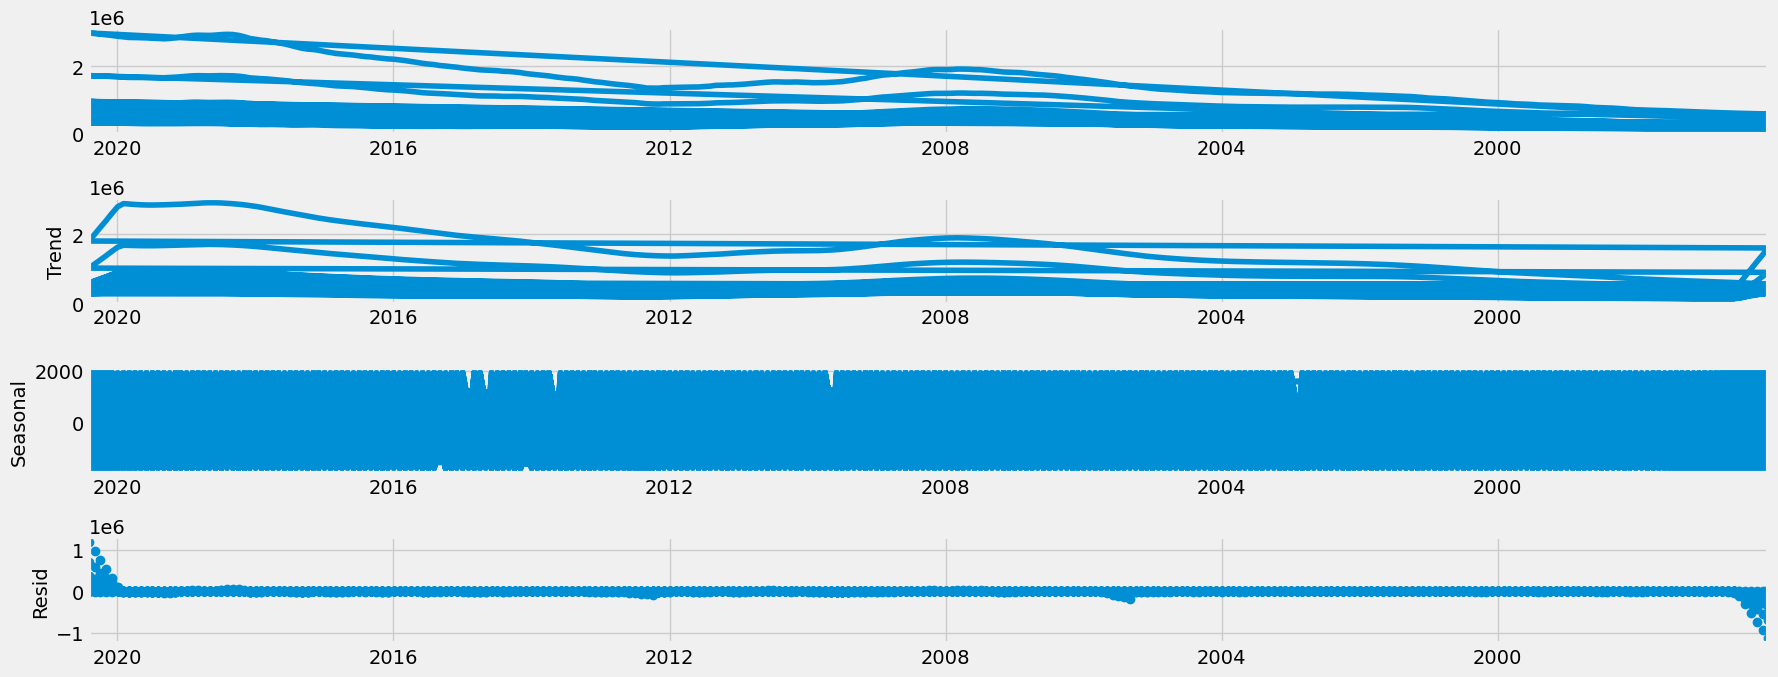

In [66]:
# Plot the separate components
decomposition.plot()

plt.show()

The time series exhibits a declining trend since around 2016, with clear seasonal fluctuations. Additionally, it contains random noise throughout the data.

In [ ]:
# 4. Testing for stationarity

In [67]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return \n",
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",
   
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function\n",

In [68]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    return result


In [70]:
# Apply the test using the function on the time series\n",
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:


Test Statistic                -6.106017e+00
p-value                        9.580836e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    8.808000e+03
Critical Value (1%)           -3.431093e+00
Critical Value (5%)           -2.861868e+00
Critical Value (10%)          -2.566945e+00
dtype: float64

The Dickey-Fuller test shows a highly negative test statistic and an extremely low p-value, supporting the stationarity of the time series. With 8,808 observations and zero lags, the test statistic is below critical values at 1%, 5%, and 10% significance levels, confirming the time series' stationary nature.

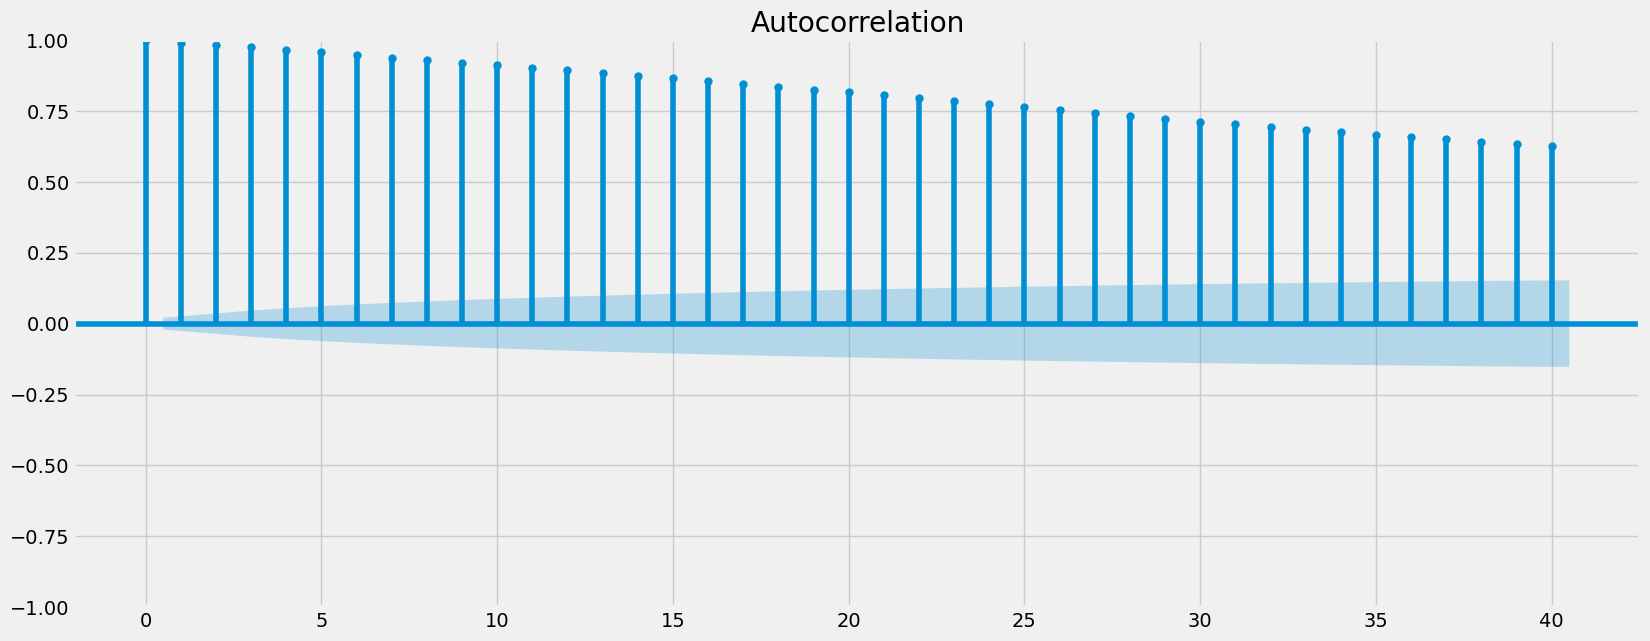

In [71]:
# Check out a plot of autocorrelations
    
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",
plot_acf(data_sub)
plt.show()

In [ ]:
# 5. Stationarizing the Zillow Real estate Data

In [72]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [73]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.

In [ ]:
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [74]:
data_diff.head()

,value
datetime,
2020-04-30,3219.0
2020-03-31,-4122.0
2020-02-29,-527.0
2020-01-31,-569.0
2019-12-31,1355.0


In [75]:
data_diff.columns

Index(['value'], dtype='object')

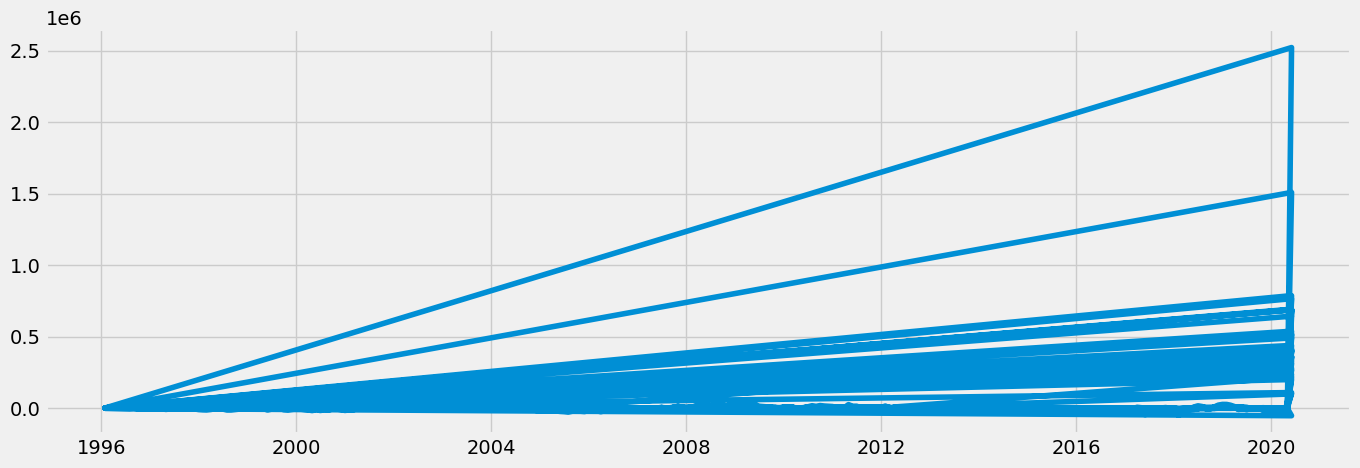

In [76]:
# Check out what the differencing did to the time-series curve
    
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [79]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:


Test Statistic                  -93.371848
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    8807.000000
Critical Value (1%)              -3.431093
Critical Value (5%)              -2.861868
Critical Value (10%)             -2.566945
dtype: float64

The Dickey-Fuller test indicates a highly negative test statistic and a p-value of 0.000000, providing strong evidence to reject the null hypothesis of non-stationarity. The test was performed with 0 lags and 8,807 observations, and the test statistic is significantly below the critical values at 1%, 5%, and 10% significance levels, confirming that the time series is stationary.

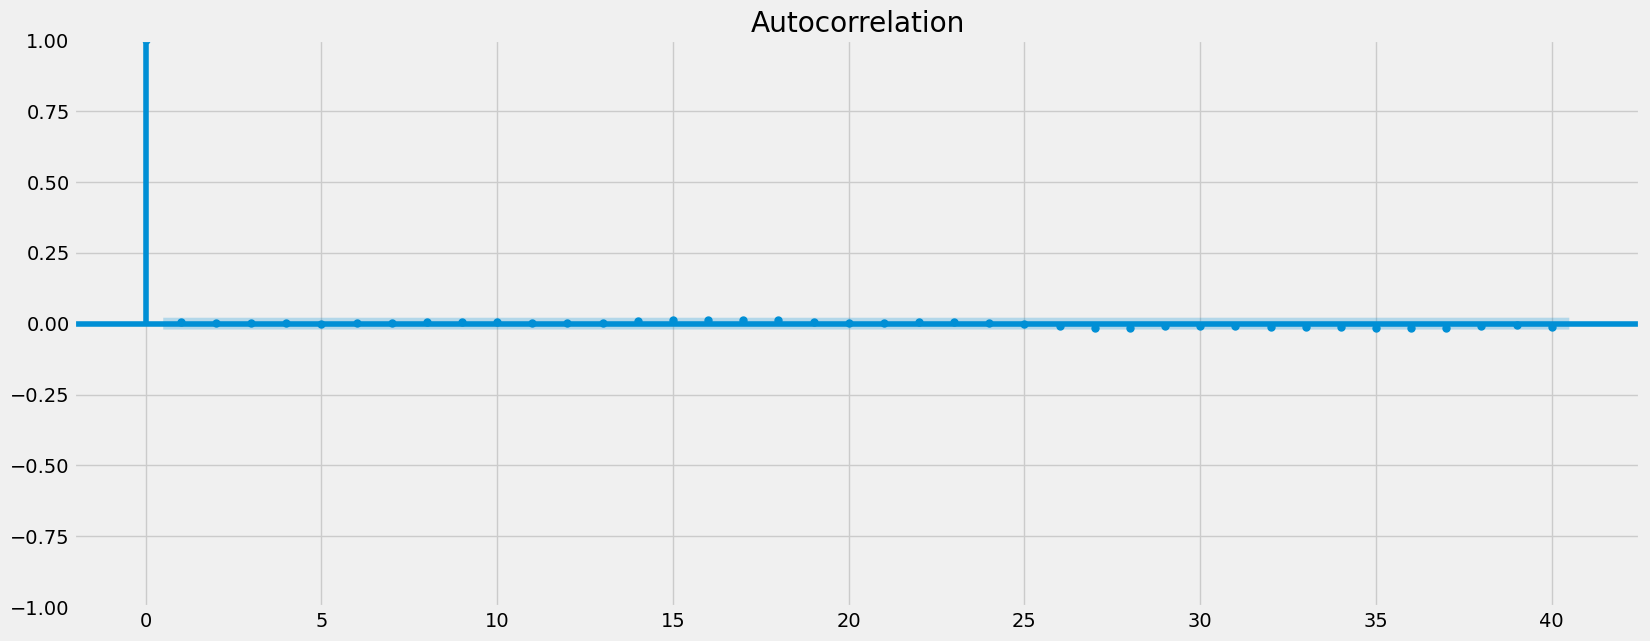

In [78]:
plot_acf(data_diff)
plt.show()